Práctica 9

In [1]:
import pandas as pd

# Creamos el dataframe
df = pd.read_csv('China_Tech_HK.csv')

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     51.72
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           8.24e-13
Time:                        05:23:50   Log-Likelihood:                -16472.
No. Observations:                2706   AIC:                         3.295e+04
Df Residuals:                    2704   BIC:                         3.296e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.6551      4.103     38.421      0.0

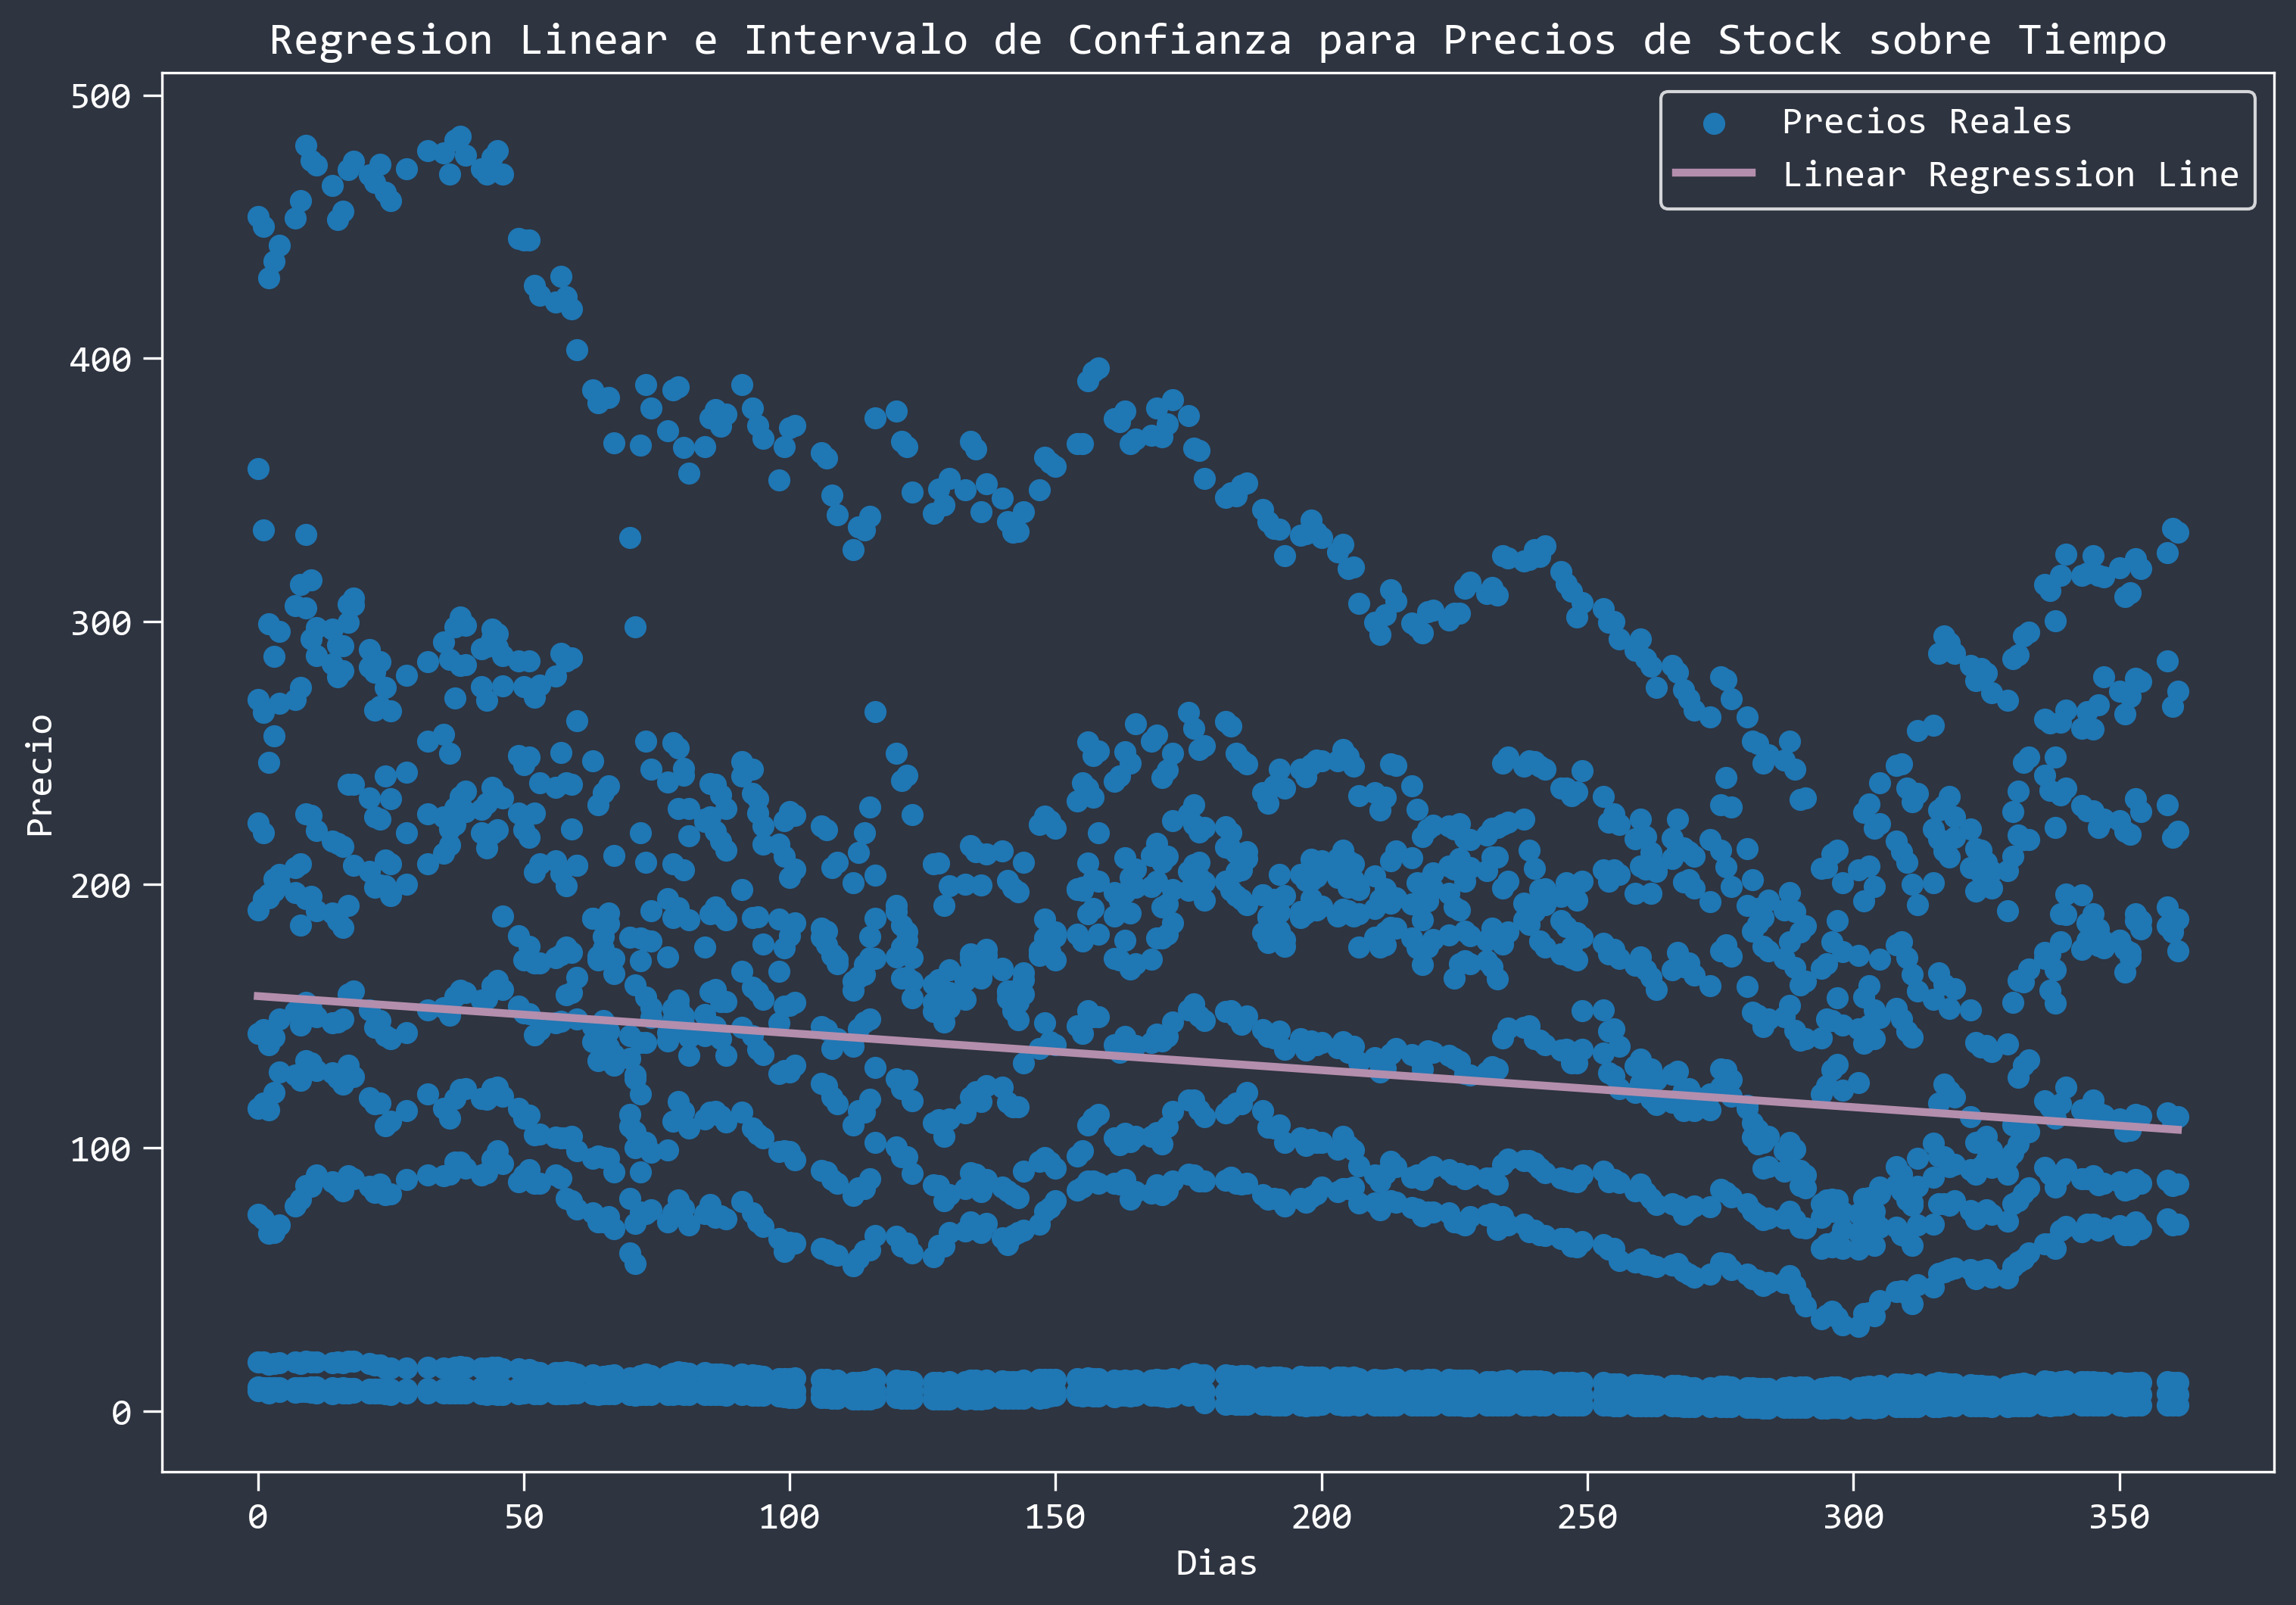

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')
df['dias'] = (df['fecha'] - df['fecha'].min()).dt.days

X = df[['dias']]
y = df['close']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

predictions = model.get_prediction(X)
pred_ci = predictions.conf_int()

plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(df['dias'], df['close'], label='Precios Reales')

plt.plot(X['dias'], predictions.predicted_mean, color='#b48ead', label='Linear Regression Line')

# Plotting the confidence interval
#plt.fill_between(X['dias'], pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='#616e88', alpha=0.2, label='Intervalo del 95%')

plt.title('Regresion Linear e Intervalo de Confianza para Precios de Stock sobre Tiempo')
plt.xlabel('Dias')
plt.ylabel('Precio')
plt.legend()

plt.style.use('miestilo.mplstyle')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.show()
